In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\HARSHIT JAIN\Desktop\data science projects\Real_Estate_Data_science_Project\DATASETS\outlier_treated\gurgaon_properties_outlier-treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft,aera_room_ratio
0,falt,dlf park place,sector 54,5.75,24689.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up...,3,4,3,12.0,North-East,Relatively New,2329.0,1900.0,1700.0,0,1,0,0,0,2,174,24689.0,776.333333
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,2.0,NaN,New Property,NaN,NaN,4500.0,1,0,0,0,0,1,66,7444.0,1125.000000
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,9.0,West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,120,8855.0,527.000000
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area:...,3,2,3,10.0,NaN,Undefined,NaN,1570.0,1099.0,0,0,0,0,0,1,0,10828.0,523.333333
4,falt,godrej nature plus,sector 33,1.35,8670.0,1557.0,Super Built up area 1557(144.65 sq.m.),3,2,3+,17.0,NaN,New Property,1557.0,NaN,NaN,0,0,0,0,0,1,38,8671.0,519.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqrt            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1682
built_up_area          1969
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
price_per_sqft            0
aera_room_ratio           0
dtype: int64

# built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

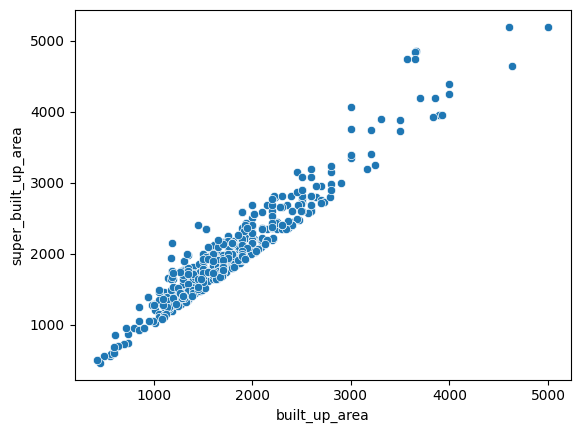

In [6]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

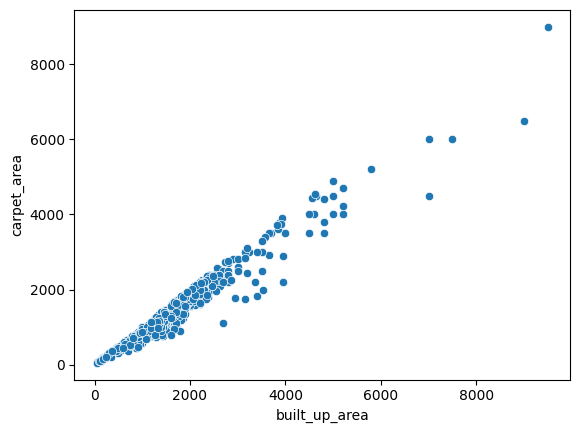

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [8]:
((df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3551    False
3552    False
3553    False
3554    False
3555    False
Length: 3556, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(531, 25)

In [11]:
super_to_built_up_area_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_area_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
super_to_built_up_area_ratio

1.105263157894737

In [14]:
carpet_to_built_up_area_ratio

0.9

In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft,aera_room_ratio
9,falt,signature global synera,sector 81,0.48,8450.0,568.0,Super Built up area 657(61.04 sq.m.)Carpet are...,2,2,1,7.0,South-East,Relatively New,657.0,NaN,568.00,0,0,0,0,0,0,70,8451.0,284.000000
12,falt,shyam apartment,sector 3,0.26,3714.0,700.0,Super Built up area 700(65.03 sq.m.)Carpet are...,2,1,2,2.0,NaN,Relatively New,700.0,NaN,530.00,0,0,0,0,0,1,0,3714.0,350.000000
25,falt,puri diplomatic greens,sector 111,3.90,13000.0,3000.0,Super Built up area 3000(278.71 sq.m.)Carpet a...,4,5,3+,6.0,North-East,Relatively New,3000.0,NaN,2950.00,0,1,0,0,0,2,160,13000.0,750.000000
44,falt,mapsko mount ville,sector 79,1.25,7716.0,1620.0,Super Built up area 1620(150.5 sq.m.)Carpet ar...,3,3,2,1.0,South-West,Relatively New,1620.0,NaN,862.18,1,0,0,1,0,0,166,7716.0,540.000000
45,falt,avl 36 gurgaon,sector 36a,0.36,8990.0,400.0,Super Built up area 406(37.72 sq.m.)Carpet are...,1,1,1,7.0,West,Relatively New,406.0,NaN,402.00,0,0,0,0,0,1,95,9000.0,400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,falt,dlf regal gardens,sector 90,1.20,6837.0,1755.0,Super Built up area 1755(163.04 sq.m.)Carpet a...,3,3,3+,15.0,South-West,Relatively New,1755.0,NaN,1400.00,0,0,0,0,0,1,118,6838.0,585.000000
3502,falt,umang winter hills,sector 77,0.92,5049.0,1822.0,Super Built up area 1822(169.27 sq.m.)Carpet a...,3,3,3,17.0,North-East,Relatively New,1822.0,NaN,1400.00,0,0,0,0,1,0,49,5049.0,607.333333
3511,falt,rof ananda,sector 95,0.26,6032.0,431.0,Super Built up area 431(40.04 sq.m.)Carpet are...,1,1,1,8.0,North,New Property,431.0,NaN,380.44,0,0,0,0,0,1,49,6032.0,431.000000
3543,falt,pareena mi casa,sector 68,1.10,9020.0,1220.0,Super Built up area 1245(115.66 sq.m.)Carpet a...,2,2,3,13.0,East,New Property,1245.0,NaN,1225.00,0,0,0,0,0,1,106,9016.0,610.000000


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace=True)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\3548745466.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace=True)
C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\3548745466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqrt            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1682
built_up_area          1548
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
price_per_sqft            0
aera_room_ratio           0
dtype: int64

In [20]:
# super present, built up and carpet is null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.shape

(874, 25)

In [22]:
sb_df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft,aera_room_ratio
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,9.0,West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,120,8855.0,527.000000
4,falt,godrej nature plus,sector 33,1.35,8670.0,1557.0,Super Built up area 1557(144.65 sq.m.),3,2,3+,17.0,NaN,New Property,1557.0,NaN,NaN,0,0,0,0,0,1,38,8671.0,519.000000
5,falt,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2,3,3,7.0,East,Relatively New,1283.0,NaN,NaN,0,1,0,0,1,1,72,7015.0,641.500000
6,falt,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.),3,4,3,12.0,North,Relatively New,1950.0,NaN,NaN,0,1,1,0,0,1,56,8462.0,650.000000
15,falt,capital residences 360,sector 70a,1.51,7641.0,1976.0,Super Built up area 1976(183.58 sq.m.),3,3,3,7.0,South-East,Relatively New,1976.0,NaN,NaN,0,1,0,0,0,1,49,7642.0,658.666667


In [23]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\1215299602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)
C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\1215299602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area

In [24]:
df.update(sb_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqrt            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1682
built_up_area           674
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
price_per_sqft            0
aera_room_ratio           0
dtype: int64

In [26]:
# super and built up  is null,  carpet is present
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\3473321853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)
C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\3473321853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(rou

In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqrt            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1682
built_up_area             0
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
price_per_sqft            0
aera_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

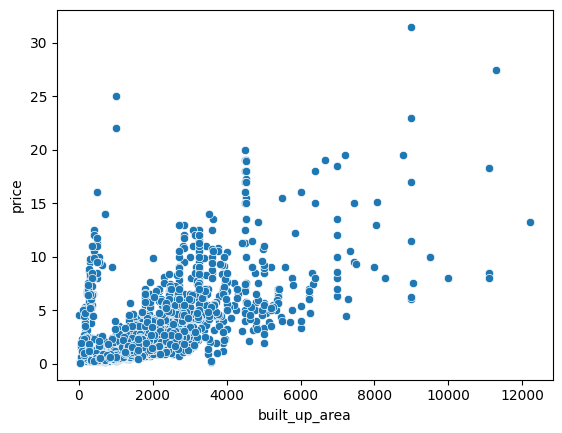

In [30]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [31]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [32]:
anamoly_df

,price,area,built_up_area
0,5.75,2329.0,1900.0
62,9.25,5580.0,630.0
96,5.70,2430.0,270.0
143,2.80,1700.0,1920.0
154,4.00,2025.0,225.0
...,...,...,...
3506,3.90,1836.0,1836.0
3529,4.85,1875.0,1697.0
3538,9.50,4071.0,500.0
3548,3.40,2200.0,1991.0


In [33]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [34]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

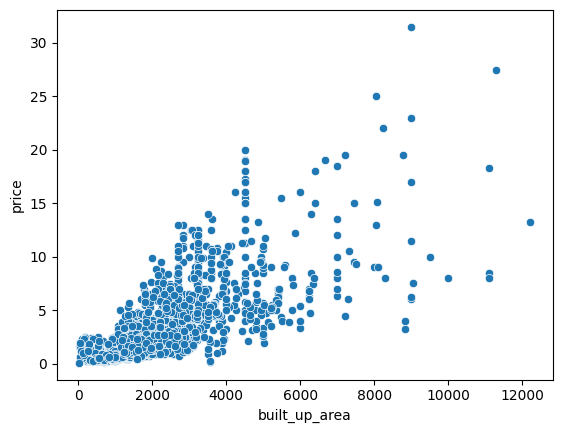

In [35]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [36]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft,aera_room_ratio
0,falt,dlf park place,sector 54,5.75,24689.0,3,4,3,12.0,North-East,Relatively New,2329.0,0,1,0,0,0,2,174,24689.0,776.333333
1,falt,palam vihar society,sector 2,3.35,7444.0,4,4,3+,2.0,NaN,New Property,5000.0,1,0,0,0,0,1,66,7444.0,1125.000000
2,falt,tulip violet,sector 69,1.40,8856.0,3,3,2,9.0,West,Relatively New,1428.0,0,0,0,1,0,1,120,8855.0,527.000000
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,NaN,Undefined,1570.0,0,0,0,0,0,1,0,10828.0,523.333333
4,falt,godrej nature plus,sector 33,1.35,8670.0,3,2,3+,17.0,NaN,New Property,1409.0,0,0,0,0,0,1,38,8671.0,519.000000


In [38]:
df.drop(columns='aera_room_ratio',inplace=True)

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft
0,falt,dlf park place,sector 54,5.75,24689.0,3,4,3,12.0,North-East,Relatively New,2329.0,0,1,0,0,0,2,174,24689.0
1,falt,palam vihar society,sector 2,3.35,7444.0,4,4,3+,2.0,NaN,New Property,5000.0,1,0,0,0,0,1,66,7444.0
2,falt,tulip violet,sector 69,1.40,8856.0,3,3,2,9.0,West,Relatively New,1428.0,0,0,0,1,0,1,120,8855.0
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,NaN,Undefined,1570.0,0,0,0,0,0,1,0,10828.0
4,falt,godrej nature plus,sector 33,1.35,8670.0,3,2,3+,17.0,NaN,New Property,1409.0,0,0,0,0,0,1,38,8671.0


In [40]:
df.drop(df.columns[-1], axis=1, inplace=True)



In [41]:
df.head()

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,falt,dlf park place,sector 54,5.75,24689.0,3,4,3,12.0,North-East,Relatively New,2329.0,0,1,0,0,0,2,174
1,falt,palam vihar society,sector 2,3.35,7444.0,4,4,3+,2.0,NaN,New Property,5000.0,1,0,0,0,0,1,66
2,falt,tulip violet,sector 69,1.40,8856.0,3,3,2,9.0,West,Relatively New,1428.0,0,0,0,1,0,1,120
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,NaN,Undefined,1570.0,0,0,0,0,0,1,0
4,falt,godrej nature plus,sector 33,1.35,8670.0,3,2,3+,17.0,NaN,New Property,1409.0,0,0,0,0,0,1,38


In [42]:
df.shape

(3556, 19)

# floorNum

In [43]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
91,falt,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,1,0
101,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,0,114
107,falt,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,1,0
349,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
427,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
488,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
890,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,1,88
1249,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,1,59
1578,house,dlf new town heights,sector 86,2.47,7718.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,0,130
1835,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,1,9


In [44]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [45]:

df['floorNum'].fillna(2.0,inplace=True)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_9608\3788705936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [46]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqrt        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing  

<Axes: ylabel='count'>

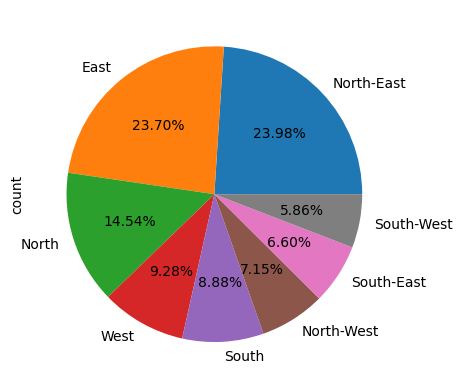

In [47]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [48]:
df.drop(columns=['facing'],inplace=True)

In [49]:
df.head()

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,falt,dlf park place,sector 54,5.75,24689.0,3,4,3,12.0,Relatively New,2329.0,0,1,0,0,0,2,174
1,falt,palam vihar society,sector 2,3.35,7444.0,4,4,3+,2.0,New Property,5000.0,1,0,0,0,0,1,66
2,falt,tulip violet,sector 69,1.40,8856.0,3,3,2,9.0,Relatively New,1428.0,0,0,0,1,0,1,120
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,Undefined,1570.0,0,0,0,0,0,1,0
4,falt,godrej nature plus,sector 33,1.35,8670.0,3,2,3+,17.0,New Property,1409.0,0,0,0,0,0,1,38


In [50]:
df.shape

(3556, 18)

In [51]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
107,falt,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [52]:
df.drop(index=[107],inplace=True)

In [53]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqrt     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [54]:
df['agePossession'].value_counts()

agePossession
Relatively New        1606
New Property           558
Moderately Old         545
Undefined              430
Old Property           293
Under Construction     123
Name: count, dtype: int64

In [55]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,Undefined,1570.0,0,0,0,0,0,1,0
23,falt,whiteland the aspen,sector 76,3.35,17615.0,3,4,3+,5.0,Undefined,2111.0,0,1,0,0,0,2,151
35,falt,dlf garden city floors,sector 92,1.70,8588.0,3,4,2,1.0,Undefined,1475.0,0,0,0,0,0,1,63
52,falt,signature global city,sector 37d,1.10,8494.0,3,3,2,2.0,Undefined,1439.0,0,0,0,0,0,1,36
59,falt,signature global city 37d ph 2,sector 37d,1.07,8237.0,3,3,2,2.0,Undefined,1450.0,0,0,0,0,0,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,house,unitech uniworld resorts,sector 33,9.50,23333.0,5,7,3+,2.0,Undefined,4071.0,1,1,1,1,0,1,57
3539,falt,dnha cghs,sector 1,0.85,3864.0,3,3,0,5.0,Undefined,2200.0,0,0,0,0,0,1,0
3545,falt,m3m heights,sector 65,2.25,13608.0,2,2,3,5.0,Undefined,1592.0,0,0,0,0,0,1,48
3553,house,bhim nagar society,sector 6,0.40,2500.0,4,2,2,1.0,Undefined,1600.0,0,0,0,0,0,1,0


In [65]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [66]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [67]:
df['agePossession'].value_counts()

agePossession
Relatively New        1785
New Property           635
Moderately Old         586
Old Property           330
Under Construction     125
Undefined               94
Name: count, dtype: int64

In [68]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [69]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [70]:
df['agePossession'].value_counts()

agePossession
Relatively New        1801
New Property           661
Moderately Old         593
Old Property           341
Under Construction     125
Undefined               34
Name: count, dtype: int64

In [71]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [72]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [73]:
df['agePossession'].value_counts()

agePossession
Relatively New        1812
New Property           661
Moderately Old         616
Old Property           341
Under Construction     125
Name: count, dtype: int64

In [74]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqrt     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [75]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)